In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img

#TO REMOVE WARNING MESSAGES
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
train_dir = r"plant_dataset_3"

batch_size = 32 
img_height = 256
img_width = 256

train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        color_mode='grayscale',
        image_size=(img_height, img_width),
        shuffle=True,
        seed= 7,
        validation_split=0.3,
        subset="training",
        crop_to_aspect_ratio=False
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        color_mode='grayscale',
        image_size=(img_height, img_width),
        shuffle=True,
        seed=7,
        validation_split=0.3,
        subset="validation",
        crop_to_aspect_ratio=False
)


Found 30905 files belonging to 4 classes.
Using 21634 files for training.
Found 30905 files belonging to 4 classes.
Using 9271 files for validation.


In [3]:
test_dir = r"testing files"
test_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        labels='inferred',
        label_mode='int',
        color_mode='grayscale',
        image_size=(img_height, img_width),
        shuffle=True,
        seed=7,
        validation_split=0.3,
        subset="validation",
        crop_to_aspect_ratio=False
)

Found 97 files belonging to 16 classes.
Using 29 files for validation.


In [4]:
class_names = train_ds.class_names
class_dic = {class_names.index(i) : i for i in class_names}
print(class_dic)

{0: 'apple', 1: 'corn', 2: 'potato', 3: 'tomato'}


In [5]:
# FOR MODEL BUILDING
def modelBuild(num_classes, channel):
    model = Sequential([
    layers.Resizing(img_height, img_width, input_shape=(img_height, img_width, channel)),
    layers.Rescaling(1./255, ),
    layers.RandomRotation(0.2),
    layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),           
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),                                              
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

    return model


In [6]:
# FOR MODEL TRAINING

def modelTraining(model, train_ds, valid_ds):
    
    epochs=50
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=10,
                                                restore_best_weights = True
                                            )
    
    history = model.fit(
        train_ds,
        validation_data=valid_ds,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[callback]
    )
    return history, model

In [7]:
# FOR PLOTING TRAINED MODEL ACCURACY AND LOSS

def history_graph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()


In [8]:
num_classes = len(class_names)

model_plant = modelBuild(num_classes, 1)
model_plant.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 256, 256, 1)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 1)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 1)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4

Epoch 1/50
677/677 [==============================] - 29s 38ms/step - loss: 0.9136 - accuracy: 0.6101 - val_loss: 1.0400 - val_accuracy: 0.6300
Epoch 2/50
677/677 [==============================] - 25s 37ms/step - loss: 0.5352 - accuracy: 0.7993 - val_loss: 0.4331 - val_accuracy: 0.8384
Epoch 3/50
677/677 [==============================] - 26s 39ms/step - loss: 0.3913 - accuracy: 0.8583 - val_loss: 0.5087 - val_accuracy: 0.8144
Epoch 4/50
677/677 [==============================] - 26s 38ms/step - loss: 0.3248 - accuracy: 0.8846 - val_loss: 0.4047 - val_accuracy: 0.8463
Epoch 5/50
677/677 [==============================] - 26s 38ms/step - loss: 0.2903 - accuracy: 0.8973 - val_loss: 0.3840 - val_accuracy: 0.8543
Epoch 6/50
677/677 [==============================] - 27s 40ms/step - loss: 0.2530 - accuracy: 0.9106 - val_loss: 0.2421 - val_accuracy: 0.9126
Epoch 7/50
677/677 [==============================] - 27s 40ms/step - loss: 0.2240 - accuracy: 0.9202 - val_loss: 0.2885 - val_accuracy:

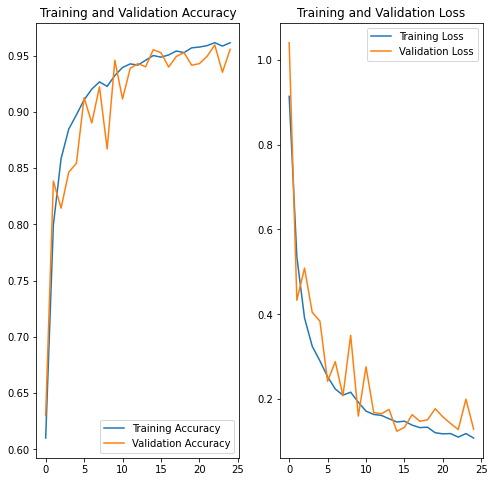

In [9]:
start = time.time()
history_plant, model_plant = modelTraining(model_plant, train_ds, valid_ds)
end = time.time()
plant_train_time = end-start

history_graph(history_plant)

In [10]:
# model_plant = modelBuild(num_classes, 1)
# history_plant, model_plant = modelTraining(model_plant, train_ds, valid_ds)
# history_graph(history_plant)
# model_plant.save('saved_model/plant_classify_model')

In [11]:
model_plant.save('saved_model/plant_classify_model')

In [12]:
model2 = tf.keras.models.load_model('saved_model/plant_classify_model')
result = model2.evaluate(valid_ds)

290/290 [==============================] - 5s 15ms/step - loss: 0.1245 - accuracy: 0.9552


In [13]:
# PLANT CLASS CLASSIFICATION TESTING

path = r"plant_dataset_3\tomato\Tomato___Leaf_Mold\3a0fc986-02fd-42fd-a1e8-9a1d6e635fb0___Crnl_L.Mold 8969.JPG"

img = load_img(path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
print(img_array.shape)

gray_img_array = tf.image.rgb_to_grayscale(img_array)
gray_img_array = tf.expand_dims(gray_img_array, 0)

img_array = tf.expand_dims(img_array, 0)

pred = model2.predict(gray_img_array)
score = tf.nn.softmax(pred)
    
print("{} : {:.2f} % ".format(class_dic[np.argmax(score)], 100 * np.max(score)))

(256, 256, 3)
1/1 [==============================] - 0s 141ms/step
tomato : 47.43 % 


In [14]:
print(img_array.shape)
print(gray_img_array.shape)


(1, 256, 256, 3)
(1, 256, 256, 1)


In [15]:
#TO MAKE DATASET FOR EACH PLANT CLASS

def img_preprocess(train_dir):
    

    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        color_mode='rgb',
        batch_size= batch_size,
        image_size=(img_height, img_width),
        shuffle=True,
        seed= 7,
        validation_split=0.3,
        subset="training",
        crop_to_aspect_ratio=False,
    )

    valid_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        color_mode='rgb',
        batch_size= batch_size,
        image_size=(img_height, img_width),
        shuffle=True,
        seed=7,
        validation_split=0.3,
        subset="validation",
        crop_to_aspect_ratio=False,
    )
    return train_ds, valid_ds

Found 7969 files belonging to 4 classes.
Using 5579 files for training.
Found 7969 files belonging to 4 classes.
Using 2390 files for validation.
{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy'}
Epoch 1/50
175/175 [==============================] - 10s 55ms/step - loss: 0.8459 - accuracy: 0.6510 - val_loss: 0.7480 - val_accuracy: 0.7561
Epoch 2/50
175/175 [==============================] - 9s 52ms/step - loss: 0.4497 - accuracy: 0.8392 - val_loss: 0.4641 - val_accuracy: 0.8611
Epoch 3/50
175/175 [==============================] - 9s 51ms/step - loss: 0.3402 - accuracy: 0.8842 - val_loss: 0.4743 - val_accuracy: 0.8632
Epoch 4/50
175/175 [==============================] - 9s 52ms/step - loss: 0.2844 - accuracy: 0.9012 - val_loss: 0.2531 - val_accuracy: 0.9209
Epoch 5/50
175/175 [==============================] - 9s 51ms/step - loss: 0.2967 - accuracy: 0.9012 - val_loss: 0.3195 - val_accuracy: 0.9042
Epoch 6/50
175/175 [===============

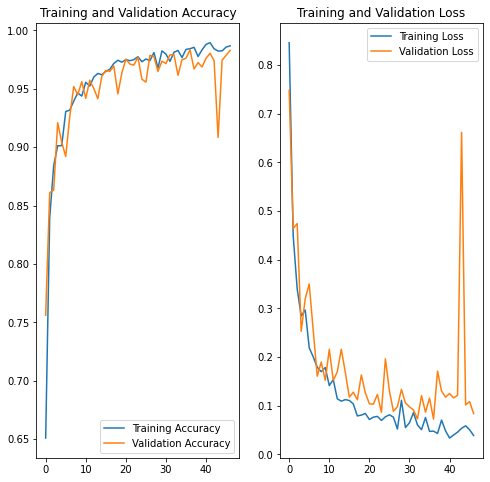

In [16]:
#FOR APPLE

apple_dir = r"plant_dataset_3\apple"
apple_train_ds, apple_valid_ds = img_preprocess(apple_dir)

apple_class_names = apple_train_ds.class_names
apple_class_dic = {apple_class_names.index(i) : i for i in apple_class_names}
print(apple_class_dic)

apple_num_classes = len(apple_class_names)
apple_model = modelBuild(apple_num_classes, 3)

#time taken to train
start = time.time()
history_apple, apple_model = modelTraining(apple_model, apple_train_ds, apple_valid_ds)
end = time.time()
apple_train_time = end-start

history_graph(history_apple)


In [17]:
apple_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)     

Found 9527 files belonging to 5 classes.
Using 6669 files for training.
Found 9527 files belonging to 5 classes.
Using 2858 files for validation.
{0: 'Tomato___Bacterial_spot', 1: 'Tomato___Early_blight', 2: 'Tomato___Late_blight', 3: 'Tomato___Leaf_Mold', 4: 'Tomato___healthy'}
Epoch 1/50
209/209 [==============================] - 12s 56ms/step - loss: 1.1858 - accuracy: 0.4921 - val_loss: 0.9691 - val_accuracy: 0.6844
Epoch 2/50
209/209 [==============================] - 11s 53ms/step - loss: 0.6796 - accuracy: 0.7553 - val_loss: 0.5250 - val_accuracy: 0.8104
Epoch 3/50
209/209 [==============================] - 11s 53ms/step - loss: 0.5311 - accuracy: 0.8070 - val_loss: 0.5892 - val_accuracy: 0.8258
Epoch 4/50
209/209 [==============================] - 11s 53ms/step - loss: 0.4357 - accuracy: 0.8423 - val_loss: 0.4436 - val_accuracy: 0.8443
Epoch 5/50
209/209 [==============================] - 11s 53ms/step - loss: 0.4094 - accuracy: 0.8504 - val_loss: 0.6067 - val_accuracy: 0.8355


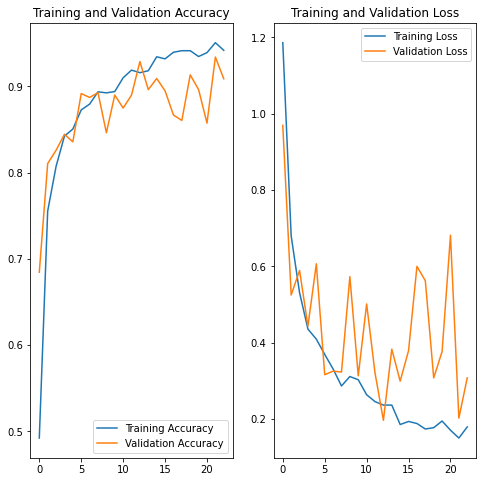

90/90 [==============================] - 2s 24ms/step - loss: 0.1968 - accuracy: 0.9286


[0.19680769741535187, 0.9286214113235474]

In [18]:
#FOR tomato

tomato_dir = r"plant_dataset_3\tomato"
tomato_train_ds, tomato_valid_ds = img_preprocess(tomato_dir)

tomato_class_names = tomato_train_ds.class_names
tomato_class_dic = {tomato_class_names.index(i) : i for i in tomato_class_names}
print(tomato_class_dic)

tomato_num_classes = len(tomato_class_names)
tomato_model = modelBuild(tomato_num_classes, 3)

start = time.time()
history_tomato, tomato_model = modelTraining(tomato_model, tomato_train_ds, tomato_valid_ds)
end = time.time()
tomato_train_time = end-start

history_graph(history_tomato)

tomato_model.evaluate(tomato_valid_ds)


Found 7573 files belonging to 4 classes.
Using 5302 files for training.
Found 7573 files belonging to 4 classes.
Using 2271 files for validation.
{0: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 1: 'Corn_(maize)___Common_rust_', 2: 'Corn_(maize)___Northern_Leaf_Blight', 3: 'Corn_(maize)___healthy'}
Epoch 1/50
166/166 [==============================] - 10s 56ms/step - loss: 0.5766 - accuracy: 0.7840 - val_loss: 0.4239 - val_accuracy: 0.8459
Epoch 2/50
166/166 [==============================] - 9s 52ms/step - loss: 0.2947 - accuracy: 0.9040 - val_loss: 0.3156 - val_accuracy: 0.8890
Epoch 3/50
166/166 [==============================] - 9s 52ms/step - loss: 0.2493 - accuracy: 0.9155 - val_loss: 0.2782 - val_accuracy: 0.8926
Epoch 4/50
166/166 [==============================] - 9s 52ms/step - loss: 0.2282 - accuracy: 0.9214 - val_loss: 0.4267 - val_accuracy: 0.8058
Epoch 5/50
166/166 [==============================] - 9s 52ms/step - loss: 0.2086 - accuracy: 0.9278 - val_loss: 0.249

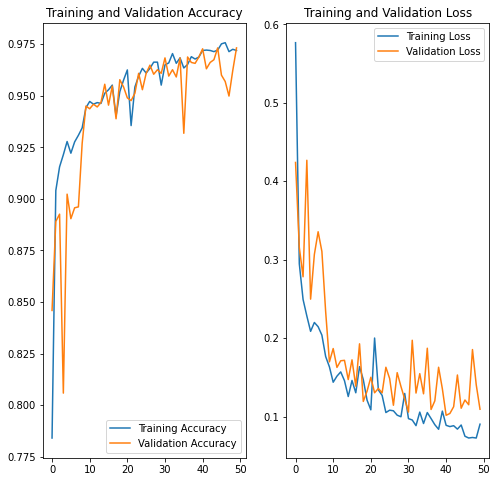

71/71 [==============================] - 2s 27ms/step - loss: 0.1093 - accuracy: 0.9731


[0.10930833220481873, 0.9731395840644836]

In [19]:
#FOR corn

corn_dir = r"plant_dataset_3\corn"
corn_train_ds, corn_valid_ds = img_preprocess(corn_dir)

corn_class_names = corn_train_ds.class_names
corn_class_dic = {corn_class_names.index(i) : i for i in corn_class_names}
print(corn_class_dic)

corn_num_classes = len(corn_class_names)
corn_model = modelBuild(corn_num_classes, 3)

start = time.time()
history_corn, corn_model = modelTraining(corn_model, corn_train_ds, corn_valid_ds)
end = time.time()
corn_train_time = end-start


history_graph(history_corn)

corn_model.evaluate(corn_valid_ds)

Found 5836 files belonging to 3 classes.
Using 4086 files for training.
Found 5836 files belonging to 3 classes.
Using 1750 files for validation.
{0: 'Potato___Early_blight', 1: 'Potato___Late_blight', 2: 'Potato___healthy'}
Epoch 1/50
128/128 [==============================] - 8s 60ms/step - loss: 0.5793 - accuracy: 0.7494 - val_loss: 1.4068 - val_accuracy: 0.6343
Epoch 2/50
128/128 [==============================] - 8s 58ms/step - loss: 0.2042 - accuracy: 0.9251 - val_loss: 0.5655 - val_accuracy: 0.8103
Epoch 3/50
128/128 [==============================] - 8s 59ms/step - loss: 0.1699 - accuracy: 0.9418 - val_loss: 0.2412 - val_accuracy: 0.9086
Epoch 4/50
128/128 [==============================] - 8s 59ms/step - loss: 0.1279 - accuracy: 0.9574 - val_loss: 0.1790 - val_accuracy: 0.9291
Epoch 5/50
128/128 [==============================] - 8s 58ms/step - loss: 0.1628 - accuracy: 0.9432 - val_loss: 0.1524 - val_accuracy: 0.9371
Epoch 6/50
128/128 [==============================] - 8s 60m

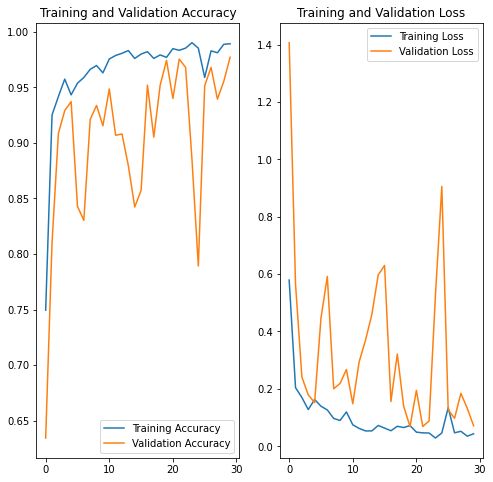

55/55 [==============================] - 1s 24ms/step - loss: 0.0686 - accuracy: 0.9743


[0.06864818930625916, 0.9742857217788696]

In [20]:
#FOR potato

potato_dir = r"plant_dataset_3\potato"
potato_train_ds, potato_valid_ds = img_preprocess(potato_dir)

potato_class_names = potato_train_ds.class_names
potato_class_dic = {potato_class_names.index(i) : i for i in potato_class_names}
print(potato_class_dic)

potato_num_classes = len(potato_class_names)
potato_model = modelBuild(potato_num_classes, 3)

start = time.time()
history_potato, potato_model = modelTraining(potato_model, potato_train_ds, potato_valid_ds)
end = time.time()
potato_train_time = end-start

history_graph(history_potato)

potato_model.evaluate(potato_valid_ds)

In [21]:
plant_val_accuracy = np.max(history_plant.history['val_accuracy'])
apple_val_accuracy = np.max(history_apple.history['val_accuracy'])
corn_val_accuracy = np.max(history_corn.history['val_accuracy'])
potato_val_accuracy = np.max(history_potato.history['val_accuracy'])
tomato_val_accuracy = np.max(history_tomato.history['val_accuracy'])
print(plant_val_accuracy)
print(apple_val_accuracy)
print(corn_val_accuracy)
print(potato_val_accuracy)
print(tomato_val_accuracy)
val_acc = [plant_val_accuracy, apple_val_accuracy, corn_val_accuracy, potato_val_accuracy, tomato_val_accuracy]

0.9594434499740601
0.9832636117935181
0.9731395840644836
0.977142870426178
0.9338698387145996


In [22]:
apple_model.save('saved_model/apple_model')
corn_model.save('saved_model/corn_model')
potato_model.save('saved_model/potato_model')
tomato_model.save('saved_model/tomato_model')

In [23]:
result_plant = model_plant.evaluate(valid_ds)
result_apple = apple_model.evaluate(apple_valid_ds)
result_corn = corn_model.evaluate(corn_valid_ds)
result_potato = potato_model.evaluate(potato_valid_ds)
result_tomato = tomato_model.evaluate(tomato_valid_ds)

90/90 [==============================] - 2s 25ms/step - loss: 0.1968 - accuracy: 0.9286


In [24]:
print('plant model ', plant_train_time)
print('apple model ', apple_train_time)
print('corn model ', corn_train_time)
print('potato model ', potato_train_time)
print('tomato model ', tomato_train_time)
train_time = [[plant_train_time, apple_train_time, corn_train_time, potato_train_time, tomato_train_time]]

plant model  683.5935859680176
apple model  424.1953217983246
corn model  444.06044030189514
potato model  209.9712097644806
tomato model  256.555606842041
